<a href="https://www.kaggle.com/code/jarvis78/simple-regression?scriptVersionId=118592059" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
data.drop(data.columns[0],axis=1,inplace=True)

In [6]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
data.shape

(30, 2)

In [8]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [9]:
data.index

RangeIndex(start=0, stop=30, step=1)

In [10]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [11]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [12]:
X=data[["YearsExperience"]]
y=data["Salary"]


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=1)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22, 1)
(22,)
(8, 1)
(8,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [16]:
print("intercept =",lr.intercept_)
print("coefficent =",lr.coef_)

intercept = 24967.148873768987
coefficent = [9261.56845302]


In [17]:
y_pred=lr.predict(X_test)

In [18]:
y_pred

array([ 74979.61852009,  91650.44173553,  62013.42268586,  81462.7164372 ,
        67570.36375767,  88871.97119962, 113878.20602278,  44416.44262512])

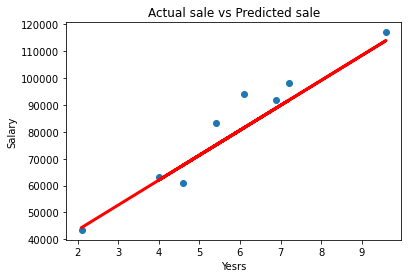

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_pred,color="red",linewidth=3)
plt.title("Actual sale vs Predicted sale")
plt.xlabel("Yesrs")
plt.ylabel("Salary")
plt.show()

In [20]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error (MAE): 5215.553722712967


In [21]:
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))

Mean square error (MSE): 40884620.50478403


In [22]:
print("R-squared value of predictions:",metrics.r2_score(y_test,y_pred))

R-squared value of predictions: 0.9180980074804028


In [23]:
df_check = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10].ravel()})
df_check

,Actual,Predicted
0,83089.0,74979.618520
1,98274.0,91650.441736
2,63219.0,62013.422686
3,93941.0,81462.716437
4,61112.0,67570.363758
5,91739.0,88871.971200
6,116970.0,113878.206023
7,43526.0,44416.442625


Text(6.799999999999997, 0.5, 'count')

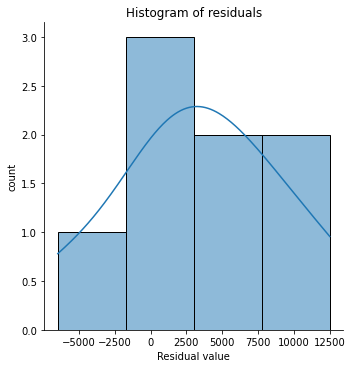

In [24]:
import seaborn as sns
 ## first compute vector of residuals. 
resids = np.subtract(y_test, y_pred)

## now make the residual plots
sns.displot(resids, kde = True)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')

<Figure size 2160x1080 with 0 Axes>

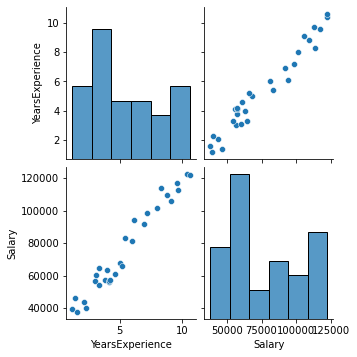

In [25]:
plt.figure(figsize=(30,15))
sns.pairplot(data)
plt.show()